In [1]:
import pandas as pd
from collections import Counter
import re

df = pd.read_csv("contents.csv")

text = " "
for idx, row in df.iterrows():
    if row.Tokens:
        text += row.Text

In [2]:
cnt = Counter(re.split(r"[\s\.!'\"’]", text.lower()))
cnt.most_common(100)

[('', 1522020),
 ('de', 749940),
 ('que', 468304),
 ('le', 404138),
 ('la', 376734),
 ('&', 362478),
 ('l', 358624),
 ('en', 305378),
 ('vous', 303460),
 ('à', 296598),
 ('d', 278821),
 ('qu', 274003),
 ('il', 265770),
 ('ie', 249461),
 ('est', 247336),
 ('ne', 232452),
 ('qui', 219322),
 ('les', 219309),
 ('ce', 200596),
 ('et', 193081),
 ('vn', 189145),
 ('pour', 179745),
 ('a', 165674),
 ('n', 159419),
 ('me', 158876),
 ('mon', 152503),
 ('si', 136467),
 ('des', 133719),
 ('m', 124423),
 ('plus', 118005),
 ('je', 110616),
 ('ma', 110321),
 ('son', 109307),
 ('on', 102538),
 ('du', 99424),
 ('mais', 98213),
 ('pas', 92933),
 ('par', 91882),
 ('nous', 91681),
 ('sa', 90087),
 ('au', 89799),
 ('s', 88507),
 ('i', 87869),
 ('bien', 84727),
 ('dans', 83463),
 ('tout', 81499),
 ('se', 81061),
 ('un', 79659),
 ('vne', 78058),
 ('c', 75002),
 ('elle', 72526),
 ('tu', 67359),
 ('sans', 66777),
 ('vostre', 66121),
 ('ay', 64013),
 ('mes', 63982),
 ('luy', 62035),
 ('ses', 59020),
 ('fait', 5

In [3]:
Counter(text.lower())

Counter({' ': 21712565,
         'e': 16428090,
         's': 8179582,
         'u': 7069090,
         'a': 7002289,
         'r': 6946074,
         'i': 6852041,
         'n': 6753442,
         'o': 6293531,
         't': 6045859,
         'l': 4733028,
         'm': 3210024,
         'd': 3196968,
         'c': 3057105,
         'p': 2700308,
         ',': 2079126,
         'v': 1730363,
         '.': 1417385,
         'q': 1378555,
         '’': 1265870,
         'f': 1182013,
         'y': 956475,
         'g': 881845,
         'b': 869756,
         'h': 847973,
         '́': 615043,
         'x': 509167,
         '̀': 373974,
         'z': 370970,
         '&': 367771,
         'j': 337268,
         '-': 261531,
         "'": 255188,
         '?': 180453,
         ';': 176463,
         ':': 147024,
         '̂': 115799,
         '!': 100658,
         '̧': 95295,
         'œ': 89314,
         '̈': 84964,
         '̃': 63488,
         '1': 27530,
         'ß': 26861,
         '2': 1

In [2]:
import unicodedata
pairs = [["vn", "un"], ["vne", "une"], ["ie", "je"], ["estre", "être"], ["auec", "avec"]]
chars = ["s", "ſ"]

for pair in pairs:
    for tok in pair:
        df[tok] = 0
for char in chars:
    df[char] = 0 


for idx, row in df.iterrows():
    if row.Date > 1700:
        continue
    if row.Tokens:
        for char in chars:
            df.loc[idx, char] = row.Text.count(char)
        local_count = Counter(re.split(r"[\s\.!'\"’]", row.Text.lower()))
        for pair in pairs:
            for token in pair:
                df.loc[idx, token] = local_count.get(unicodedata.normalize("NFD", token), 0)

<Figure size 1000x600 with 0 Axes>

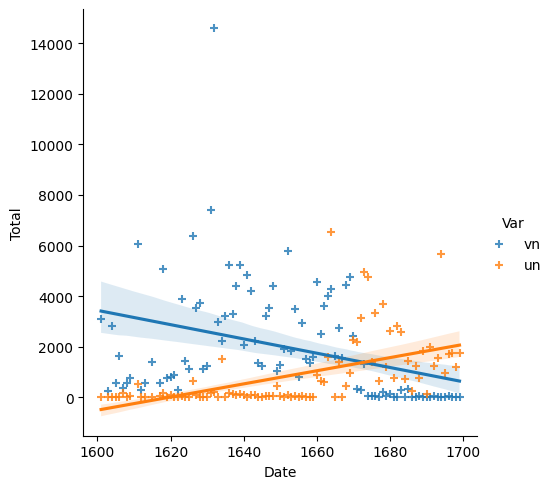

<Figure size 1000x600 with 0 Axes>

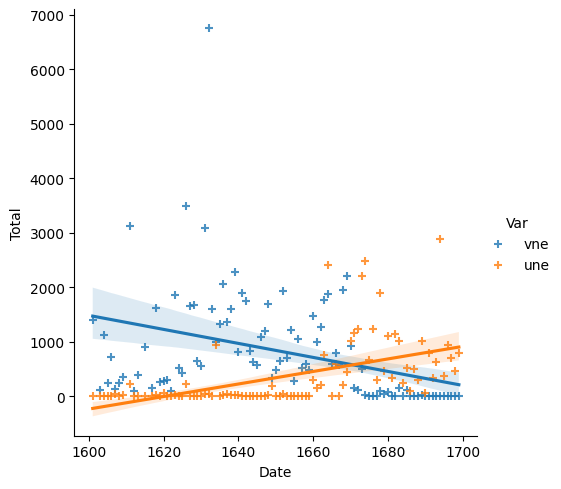

<Figure size 1000x600 with 0 Axes>

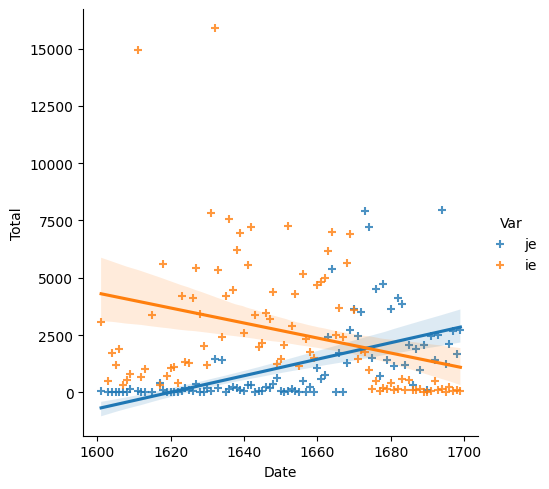

<Figure size 1000x600 with 0 Axes>

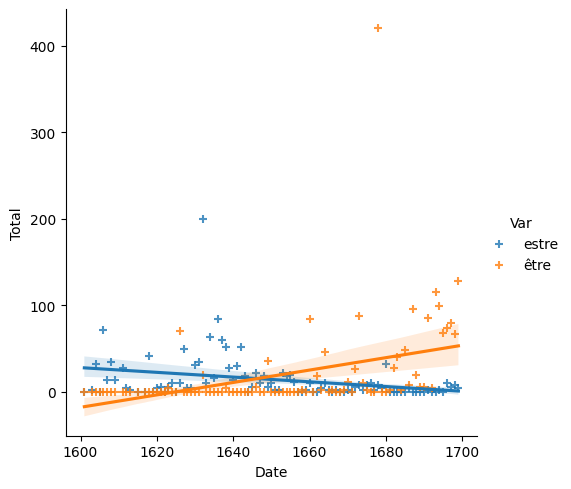

<Figure size 1000x600 with 0 Axes>

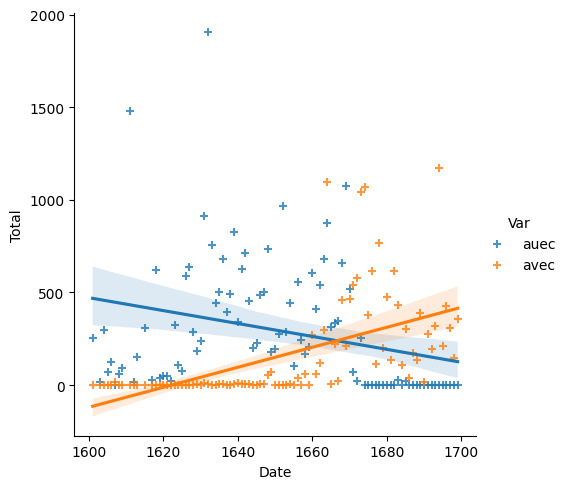

<Figure size 1000x600 with 0 Axes>

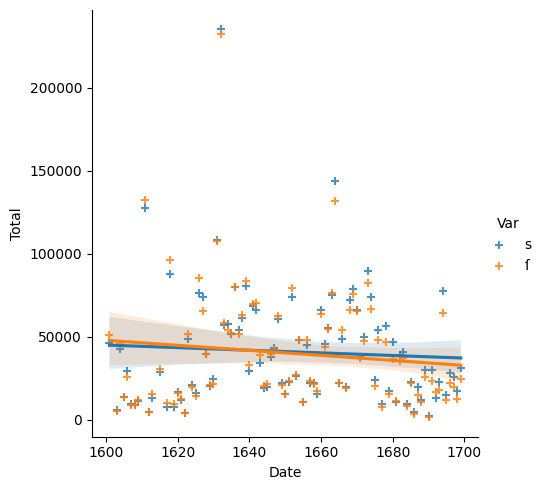

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.displot(data=df, x="Date", y="s")

# sns.scatterplot(
#     df.groupby("Date").sum(["ie", "je"]).reset_index(),
#     x="Date",
#     y=["ie", "je"]
# )
for pair in pairs + [chars]:
    new_df = []
    for _, row in df[df.Date < 1700].groupby("Date").sum(pair).reset_index().iterrows():
        for token in pair:
            new_df.append({"Date": row.Date, "Var": token, "Total": row[token]})
    new_df = pd.DataFrame(new_df)
    plt.figure(figsize=(10, 6))
    sns.lmplot(new_df, x="Date", y="Total", hue="Var", markers="+")
    